In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install keras
!pip install tensorflow

  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-uninstall-v8waz7x6\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_csv("Churn_Modelling.csv")
X=df.iloc[:,3:13]
y=df.iloc[:,13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
geography=pd.get_dummies(X['Geography'],dtype=int)
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [6]:
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [7]:
X=pd.concat([X,geography,gender],axis=1)

X=X.drop(['Geography','Gender'],axis=1) 
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [10]:
classifier=Sequential()

In [11]:
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=12))

In [12]:
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))

In [13]:
classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation='relu'))

In [14]:
classifier.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [15]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 2.9917 - accuracy: 0.5645 - val_loss: 2.6056 - val_accuracy: 0.6388
Epoch 2/10
536/536 [==============================] - 0s 885us/step - loss: 2.1967 - accuracy: 0.5990 - val_loss: 2.1246 - val_accuracy: 0.5926
Epoch 3/10
536/536 [==============================] - 0s 886us/step - loss: 1.6909 - accuracy: 0.6242 - val_loss: 1.6108 - val_accuracy: 0.6573
Epoch 4/10
536/536 [==============================] - 0s 874us/step - loss: 1.3769 - accuracy: 0.6790 - val_loss: 1.3539 - val_accuracy: 0.6978
Epoch 5/10
536/536 [==============================] - 0s 880us/step - loss: 1.0458 - accuracy: 0.7050 - val_loss: 1.0011 - val_accuracy: 0.7168
Epoch 6/10
536/536 [==============================] - 0s 866us/step - loss: 0.8843 - accuracy: 0.7270 - val_loss: 0.8770 - val_accuracy: 0.7315
Epoch 7/10
536/536 [==============================] - 0s 907us/step - loss: 0.7767 - accuracy: 0.7419 - val_loss: 0.8095 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


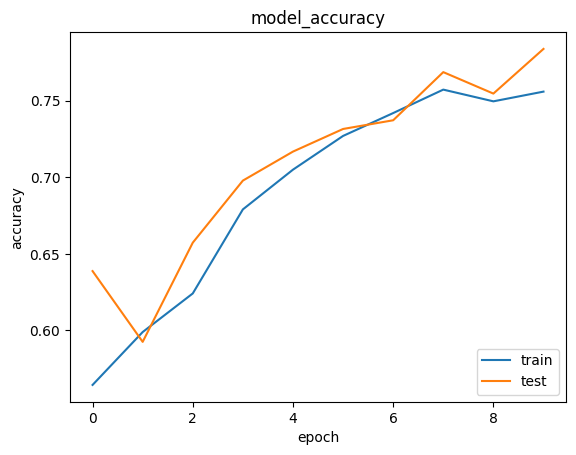

In [16]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

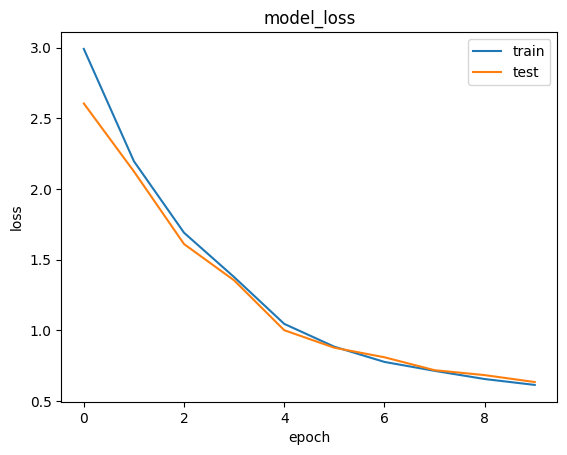

In [17]:

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()